In [2]:
import pandas as pd
import numpy as np
import string
#Importing nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
#Importing sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#Importing matplotlib for wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


In [49]:
class CustomAnalyzer(object):
    def __init__(self,stopwords_,synonyms):
        self.syns = synonyms
        self.stopwords_ = stopwords_
        
    def customanalyzer(self,strDoc):        
        #Replacing punctuations    
        puncts = string.punctuation
        for i in range(len(puncts)):
            strDoc = strDoc.replace(puncts[i], ' ')
        
        # Tokenizing the input document string 
        word_tokens = word_tokenize(strDoc)        
        word_tokens = [word for word in word_tokens if (word!="th")\
                       and ("''" != word) and ("``" != word) \
                           and (word!="'s") and not word.isnumeric()]
            
        # Map synonyms
        for i in range(len(word_tokens)):
            if word_tokens[i] in self.syns:
                word_tokens[i] = self.syns[word_tokens[i]]
           
            # Remove stop words
        punctuation = list(string.punctuation)+['..', '...']
        pron = ['it', 'him', 'they', 'we', 'us', 'them','i', 'he', 'she','let',]
        generic = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
                    "los", "sta", "la", "use", "else", "could", "would", "come", "take",'th','s']
        stop = stopwords.words('english') + punctuation + pron + generic + self.stopwords_
        filtered_terms = [word for word in word_tokens if (word not in stop) and \
                          (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
                          and (not word.replace("'",'',2).isnumeric())]
            
        # Lemmatization & Stemming - Stemming with WordNet POS               
        tagged_tokens = pos_tag(filtered_terms, lang='eng')        
            
        # Stemming with for terms without WordNet POS
        stemmer = SnowballStemmer("english")
        wordnet_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
        wordnetlem = WordNetLemmatizer()
        stemmed_tokens = []
        for tagged_token in tagged_tokens:
            term = tagged_token[0]
            pos  = tagged_token[1]
            pos  = pos[0]
            try:
                pos   = wordnet_tags[pos]
                lemma_token = wordnetlem.lemmatize(term, pos=pos)
                if lemma_token not in stop:
                    stemmed_tokens.append(lemma_token)
            except:
                lemma_token = stemmer.stem(term)
                if lemma_token not in stop:
                    stemmed_tokens.append(lemma_token)
        return stemmed_tokens

# For Netflix Only 

In [42]:
comments_df = pd.read_csv('platform_comments_2.csv')
comments_df.drop(comments_df.columns.difference(['comments_attributes_final','comments']), 1, inplace=True)
comments_df.rename(columns={'comments':'original_comments','comments_attributes_final': 'clean_comments'}, inplace=True)
comments_df

,original_comments,clean_comments
0,you can subscribe through amazon and it shows ...,subscribe amazon show inside amazon app roku
1,well as someone who was a vue user and left fo...,well someone wa vue user left youtube went sad...
2,when did that happen im not aware of youtube d...,happen im aware youtube dropping channel air xfl
3,yup and my team is tanking so i cut youtube la...,yup team tanking cut youtube last month went p...
4,that’s sucks youtube was the only option i had...,that’s suck youtube wa option sling lost fox s...
...,...,...
36524,what do you cut when all these streaming servi...,cut streaming service get high honestly weve g...
36525,well time to take a look at what we have again...,well time take look youtube philo gave u nice ...
36526,i agree fubo is pretty decent for live sports ...,agree fubo pretty decent live sport even adsdi...
36527,that’s even worse than vue it’s officially che...,that’s even worse vue it’s officially cheaper ...


In [43]:
from nltk import word_tokenize

def tokenizer(sentence):
    tokens = word_tokenize(sentence)
    return tokens 

series = comments_df["clean_comments"].apply(tokenizer)
comments_df = comments_df.assign(tokenized_comments = series)
comments_df

,original_comments,clean_comments,tokenized_comments
0,you can subscribe through amazon and it shows ...,subscribe amazon show inside amazon app roku,"[subscribe, amazon, show, inside, amazon, app,..."
1,well as someone who was a vue user and left fo...,well someone wa vue user left youtube went sad...,"[well, someone, wa, vue, user, left, youtube, ..."
2,when did that happen im not aware of youtube d...,happen im aware youtube dropping channel air xfl,"[happen, im, aware, youtube, dropping, channel..."
3,yup and my team is tanking so i cut youtube la...,yup team tanking cut youtube last month went p...,"[yup, team, tanking, cut, youtube, last, month..."
4,that’s sucks youtube was the only option i had...,that’s suck youtube wa option sling lost fox s...,"[that, ’, s, suck, youtube, wa, option, sling,..."
...,...,...,...
36524,what do you cut when all these streaming servi...,cut streaming service get high honestly weve g...,"[cut, streaming, service, get, high, honestly,..."
36525,well time to take a look at what we have again...,well time take look youtube philo gave u nice ...,"[well, time, take, look, youtube, philo, gave,..."
36526,i agree fubo is pretty decent for live sports ...,agree fubo pretty decent live sport even adsdi...,"[agree, fubo, pretty, decent, live, sport, eve..."
36527,that’s even worse than vue it’s officially che...,that’s even worse vue it’s officially cheaper ...,"[that, ’, s, even, worse, vue, it, ’, s, offic..."


In [44]:
#create copy of original df
netflix_df= comments_df.copy(deep = True)

#get only comments that contain netflix in it
string = ['netflix']
mask = netflix_df['clean_comments'].str.contains('|'.join(string),regex=True)
netflix_df=netflix_df[mask]
netflix_df.rename(columns={'tokenized_comments': 'net_tokenized_comments'}, inplace=True)
netflix_df

,original_comments,clean_comments,net_tokenized_comments
8,netflix soon to be changed to hbomax\n\nhulu\n...,netflix soon changed hbomax hulu amazon amazon...,"[netflix, soon, changed, hbomax, hulu, amazon,..."
9,netflix amazon video starz and ameba disney h...,netflix amazon video starz ameba disney hulu o...,"[netflix, amazon, video, starz, ameba, disney,..."
11,\n youtube starz and showtime addons \n philo\...,youtube starz showtime adsdons philo netflix a...,"[youtube, starz, showtime, adsdons, philo, net..."
14,netflix via tmobile\n\ndisney via verizon fio...,netflix via tmobile disney via verizon fios hu...,"[netflix, via, tmobile, disney, via, verizon, ..."
16,amazon probably the best overall value shippin...,amazon probably best overall value shipping am...,"[amazon, probably, best, overall, value, shipp..."
...,...,...,...
36508,this is pretty steep especially with no nfl ne...,pretty steep especially nfl network may need l...,"[pretty, steep, especially, nfl, network, may,..."
36510,gt im good with my netflix huludisneyespn bund...,gt im good netflix huludisneyespn bundle 30 mo...,"[gt, im, good, netflix, huludisneyespn, bundle..."
36512,this is my inclination as well ive barely watc...,inclination well ive barely watched youtube si...,"[inclination, well, ive, barely, watched, yout..."
36517,had that conversation about a year ago and end...,conversation year ago ended getting rid live t...,"[conversation, year, ago, ended, getting, rid,..."


In [45]:
text_content= 'clean_comments'
#declaring number of topics to be created from text data
total_topics = 5

In [46]:
# Declaring synonyms for commonly used words in English text content
synonyms_ = {"aren't": "are not", "can't": "cannot", "couldn't": "could not",
                 "didn't": "did not", "doesn't": "does not", "don't": "do not",
                 "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                 "he'd": "he would", "he'll": "he will", "he's": "he is",
                 "i'd": "I had", "i'll": "I will", "i'm": "I am", "isn't": "is not",
                 "it's": "it is", "it'll": "it will", "i've": "I have", "let's": "let us",
                 "mightn't": "might not", "mustn't": "must not", "shan't": "shall not",
                 "she'd": "she would", "she'll": "she will", "she's": "she is",
                 "shouldn't": "should not", "that's": "that is", "there's": "there is",
                 "they'd": "they would", "they'll": "they will", "they're": "they are",
                 "they've": "they have", "we'd": "we would", "we're": "we are",
                 "weren't": "were not", "we've": "we have", "what'll": "what will",
                 "what're": "what are", "what's": "what is", "what've": "what have",
                 "where's": "where is", "who'd": "who would", "who'll": "who will",
                 "who're": "who are", "who's": "who is", "who've": "who have",
                 "won't": "will not", "wouldn't": "would not", "you'd": "you would",
                 "you'll": "you will", "you're": "you are", "you've": "you have",
                 "'re": " are", "wasn't": "was not", "we'll": " will", "tryin'": "trying","thank":"thanks"}

# Declaring additional stopwords based on text content and context
stopwords_ = ['article','Articles','page','wikipedia','talk','edit', 'one','make','please','like','see','think',
      'know','source','go','also','time','add','people','user','well','need','block','may','want','link','image',
      'good','name','delete','find','look','thanks','work','remove','even','comment','help','write','information',
      'change','way','list','give','deletion','editor','question','section','point','thing','try','wiki',
      'first','wp','new','fact','seem','state','read','reference','discussion','right','thank','many','place','much',
      'ask','revert','really','mean','reason','call','include','sinc','edits','create','word','back','note','tag',
      'post','someone','policy','wiki','show','leave','issue','two','year','still','stop',
      'content',	'hi',	'case',	'consider',	'something',	'keep',	'claim',	'http',	'mention',	'without',
      'problem',	'let',	'day',	'person',	'utc',	'request',	'welcome',	'believe',	'anoth',	'might',
      'subject',	'feel',	'part',	'free',	'start',	'however',	'sure',	'never',	'tell',	'book',	'view',
      'copyright',	'actually',	'anything',	'follow',	'agree',	'regard',	'continue',	'best',	'hope',	'understand',
      'site',	'long',	'provide',	'already',	'term',	'great',	'move',	'com',	'nothing',	'review',	'though',
      'notice',	'little',	'explain',	'message',	'last',	'anyone',	'must',	'others',	'contribution',	'speedy',
      'example',	'number',	'account',	'style',	'text',	'bad',	'title',	'sorry',	'appear',	'rather',
      'fair',	'different',	'ip',	'matter',	'life',	'non',	'cite',	'suggest',	'report',	'template',	'guideline',
      'correct',	'statement',	'old',	'lot',	'address',	'original',	'probably',	'language',	'everi',	'material',
      'top',	'simply',	'consensus',	'hello',	'either',	'live',	'interest',	'far',	'least',	'notable',	'yes','date',
      'enough',	'etc',	'idea',	'base',	'around',	'admin',	'ban',	'real',	'version',	'www',	'website',	'yet',	'evidence',
      'clear',	'encyclopedia',	'quote',	'end',	'research',	'topic',	'picture',	'clearly',	'medium',	'ever',	'file',
      'maybe',	'exist',	'instead',	'country',	'org',	'pov',	'criterion',	'important',	'true',	'oh',	'always',
      'happen',	'perhaps',	'quite',	'whether',	'care',	'big',	'lead',	'bit',	'administrator',	'contribute',	'sign',
      'citation',	'answer',	'allow',	'second',	'sentence',	'three',	'line',	'several',	'hey',	'high',	'man',
      'argument',	'project',	'current',	'kind',	'redirect',	'action',	'general',	'refer',	'common',	'mind',
      'summary',	'concern',	'course',	'discuss',	'present',	'result',	'possible',	'main',	'accept',	'test','learn',
      'order',	'play',	'type',	'less',	'dont',	'jpg',	'en',	'member',	'attempt',	'ok',	'sense',	'party',	'week',
      'form',	'info',	'notability',	'position',	'act',	'side',	'contribs',	'company',	'city',	'entry',	'warn',	'four',
      'specific',	'news',	'publish',	'appropriate',	'standard',	'single',	'detail',	'anyway',	'open',	'reply','cause',
      'fix',	'meet',	'next',	'describe',	'system',	'film',	'copy',	'full',	'although',	'per',	'upload',	'relevant',
      'away',	'lol',	'stay',	'record',	'large',	'speak',	'recent',	'band',	'search',	'run',	'official',	'process',	'public',
      'month',	'area',	'response',	'currently',	'everyone',	'especially',	'later','release',	'able',	'propose',
      'check','paragraph','web','otherwise','generally']

In [24]:
np.array(netflix_df[text_content])

array(['netflix soon changed hbomax hulu amazon amazon disney',
       'netflix amazon video starz ameba disney hulu oznoz hbomax go',
       'youtube starz showtime adsdons philo netflix amazon video free amazon',
       ...,
       'inclination well ive barely watched youtube since sport went dark homerun quality train partner watch news 60 minute shes watching netflix pandemic sport come back actually care enough want watch right empty arena game athlete sitting due covid symptom seems like hard pas weigh option includes remedy used fill youtubes gap',
       'conversation year ago ended getting rid live tv streaming thought needed news sport cable tv realized easily live without use youtube random watching tv service ha got lot good stuff video podcasts news sport highlight tech science use netflix hulu amazon amazon movie show watching service service bundled service im really priceing soley netflix tmobile amazon amazon video amazon account free delivery thing missing lakers game

In [47]:
#instantiating custom analyzer class object
ca = CustomAnalyzer(stopwords_,synonyms_)
max_df = 1.9 
min_df = 10
cv = CountVectorizer(max_df=max_df, min_df=min_df, max_features=None,lowercase=True,\
                     analyzer = ca.customanalyzer)
#Fitting count vectorizer 
td = cv.fit_transform(np.array(netflix_df[text_content].values.astype('U')))

# #getting the terms(features) generated by count vectorizer
terms = cv.get_feature_names()


NameError: name 'strDoc' is not defined

In [21]:

# # next step is to implement Latent Drichilet Allocation 
lda = LatentDirichletAllocation(n_components=total_topics, 
             max_iter=15,learning_method='online', 
             learning_offset=15,random_state=1234)
ldaTransform = lda.fit_transform(td)


In [33]:
# #declaring number of terms we need per topic
terms_count = 6
# #Looping over lda components to get topics and their related terms with high probabilities
for idx,topic in enumerate(lda.components_):    
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}
    
    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]    
    wcloud = WordCloud(background_color="white",mask=None, max_words=100,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')


Topic#  1
tv,netflix,channel,roku,service,stream

Topic#  2
netflix,amazon,hbomax,hulu,price,disney

Topic#  3
netflix,watch,quality,ha,movie,wa

Topic#  4
service,stream,price,netflix,wa,cable

Topic#  5
netflix,price,subscriber,theyre,disney,million



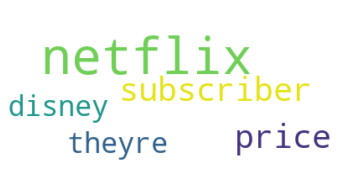

In [25]:
    wcloud.generate_from_frequencies(dict_word_frequency)       
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("Topic#"+str(idx+1), format="png")

# For Whole Forum 

In [35]:
comments_df = pd.read_csv('platform_comments_2.csv')
comments_df.drop(comments_df.columns.difference(['comments_attributes_final','comments']), 1, inplace=True)
comments_df.rename(columns={'comments':'original_comments','comments_attributes_final': 'clean_comments'}, inplace=True)
comments_df

,original_comments,clean_comments
0,you can subscribe through amazon and it shows ...,subscribe amazon show inside amazon app roku
1,well as someone who was a vue user and left fo...,well someone wa vue user left youtube went sad...
2,when did that happen im not aware of youtube d...,happen im aware youtube dropping channel air xfl
3,yup and my team is tanking so i cut youtube la...,yup team tanking cut youtube last month went p...
4,that’s sucks youtube was the only option i had...,that’s suck youtube wa option sling lost fox s...
...,...,...
36524,what do you cut when all these streaming servi...,cut streaming service get high honestly weve g...
36525,well time to take a look at what we have again...,well time take look youtube philo gave u nice ...
36526,i agree fubo is pretty decent for live sports ...,agree fubo pretty decent live sport even adsdi...
36527,that’s even worse than vue it’s officially che...,that’s even worse vue it’s officially cheaper ...


In [36]:
from nltk import word_tokenize

def tokenizer(sentence):
    tokens = word_tokenize(sentence)
    return tokens 

series = comments_df["clean_comments"].apply(tokenizer)
comments_df = comments_df.assign(tokenized_comments = series)
comments_df

,original_comments,clean_comments,tokenized_comments
0,you can subscribe through amazon and it shows ...,subscribe amazon show inside amazon app roku,"[subscribe, amazon, show, inside, amazon, app,..."
1,well as someone who was a vue user and left fo...,well someone wa vue user left youtube went sad...,"[well, someone, wa, vue, user, left, youtube, ..."
2,when did that happen im not aware of youtube d...,happen im aware youtube dropping channel air xfl,"[happen, im, aware, youtube, dropping, channel..."
3,yup and my team is tanking so i cut youtube la...,yup team tanking cut youtube last month went p...,"[yup, team, tanking, cut, youtube, last, month..."
4,that’s sucks youtube was the only option i had...,that’s suck youtube wa option sling lost fox s...,"[that, ’, s, suck, youtube, wa, option, sling,..."
...,...,...,...
36524,what do you cut when all these streaming servi...,cut streaming service get high honestly weve g...,"[cut, streaming, service, get, high, honestly,..."
36525,well time to take a look at what we have again...,well time take look youtube philo gave u nice ...,"[well, time, take, look, youtube, philo, gave,..."
36526,i agree fubo is pretty decent for live sports ...,agree fubo pretty decent live sport even adsdi...,"[agree, fubo, pretty, decent, live, sport, eve..."
36527,that’s even worse than vue it’s officially che...,that’s even worse vue it’s officially cheaper ...,"[that, ’, s, even, worse, vue, it, ’, s, offic..."


In [37]:
text_content= 'clean_comments'
#declaring number of topics to be created from text data
total_topics = 5

In [38]:
#instantiating custom analyzer class object
ca = CustomAnalyzer(stopwords_,synonyms_)
max_df = 1.9 
min_df = 10
cv = CountVectorizer(max_df=max_df, min_df=min_df, max_features=None,lowercase=True,\
                     analyzer = ca.customanalyzer)
#Fitting count vectorizer 
td = cv.fit_transform(np.array(comments_df[text_content].values.astype('U')))

# #getting the terms(features) generated by count vectorizer
terms = cv.get_feature_names()


AttributeError: 'list' object has no attribute 'punctuation'

In [38]:
# next step is to implement Latent Drichilet Allocation 
lda = LatentDirichletAllocation(n_components=total_topics, 
             max_iter=15,learning_method='online', 
             learning_offset=15,random_state=1234)
ldaTransform = lda.fit_transform(td)

In [39]:
# #declaring number of terms we need per topic
terms_count = 6
# #Looping over lda components to get topics and their related terms with high probabilities
for idx,topic in enumerate(lda.components_):    
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}
    
    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]    
    wcloud = WordCloud(background_color="white",mask=None, max_words=100,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')


Topic#  1
price,wa,service,cable,netflix,internet

Topic#  2
channel,sling,youtube,sport,antenna,local

Topic#  3
hulu,watch,netflix,disney,service,amazon

Topic#  4
hbomax,atampt,tv,youtube,service,market

Topic#  5
apple,tv,roku,amazon,app,quality



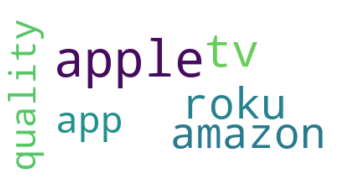

In [40]:
    wcloud.generate_from_frequencies(dict_word_frequency)       
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("Topic#"+str(idx+1), format="png")